# Lab: Linear Regression using Scikit-Learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc

np.set_printoptions(precision=2)
plt.style.use("./deeplearning.mplstyle")

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [3]:
# Load the data
X_train, y_train = load_house_data()
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

# Scale the data
scaler = StandardScaler()
x_norm = scaler.fit_transform(X_train)
print(f"Peak to peak range by col in raw X:{np.ptp(X_train, axis=0)}")
print(f"Peak to peak range by col in scaled X:{np.ptp(x_norm, axis=0)}")

Peak to peak range by col in raw X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range by col in scaled X:[5.85 6.14 2.06 3.69]


In [4]:
# Create regression model and fit it
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
Number of iterations completed: 137, number of weight updates: 13564.0


In [7]:
# View Parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print("model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.3  -21.11 -32.52 -38.02], b:[363.18]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [9]:
# Make predictions
y_pred_sgd = sgdr.predict(x_norm)
# Make a prediction using w,b
y_pred = np.dot(x_norm, w_norm) + b_norm
print(
    f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}"
)

print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.18 486.01 389.64 492.17]
Target values 
[300.  509.8 394.  540. ]


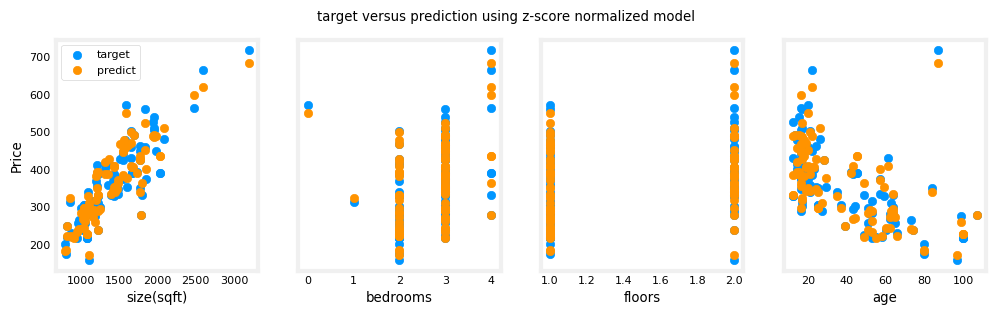

In [10]:
# Plot results
# plot predictions and targets vs original features
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color=dlc["dlorange"], label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()